Données provenant de [https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/](https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import json
import geopandas as gpd
from utils import getInputs, drawMap
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
# enable completion
%config Completer.use_jedi = False

## Preparation des données
Chargement des limites des communes et des routes (en Auvergne)

In [2]:
com = gpd.read_file('input/communes-20210101-shp/communes-20210101.shp') #limites des communes
route = gpd.read_file('input/auvergne-latest-free.shp/gis_osm_roads_free_1.shp') # routes en auvergne

Selection des limites des communes d'intérêt (via code INSEE), et des routes correspondantes

In [3]:
#communes = ['63113',  '63014', '63124', '63141', '63075', '63070',
#            '63254', '63193', '63284', '63019', '63164', '63063',
#            '63042', '63308', '63272', '63307', '63032',
#            '63042', '63099', '63263', '63345']

communes = ['63113', '63075']

# get municipality boundaries
metro = com[com.insee.isin(communes)]

# get roads
route_clipped = gpd.clip(route, metro)

Get accidents datatsets for years of interest

In [4]:
annee = ['2019']
#annee = ['2019', '2018', '2017', '2016', '2015']

df_list = []
vehic_list = []
usager_list = []

for an in annee:
    df_sel, vehic_sel, usager_sel = getInputs(an, communes)
    df_list.append(df_sel)
    vehic_list.append(vehic_sel)
    usager_list.append(usager_sel)

## Traçage des cartes

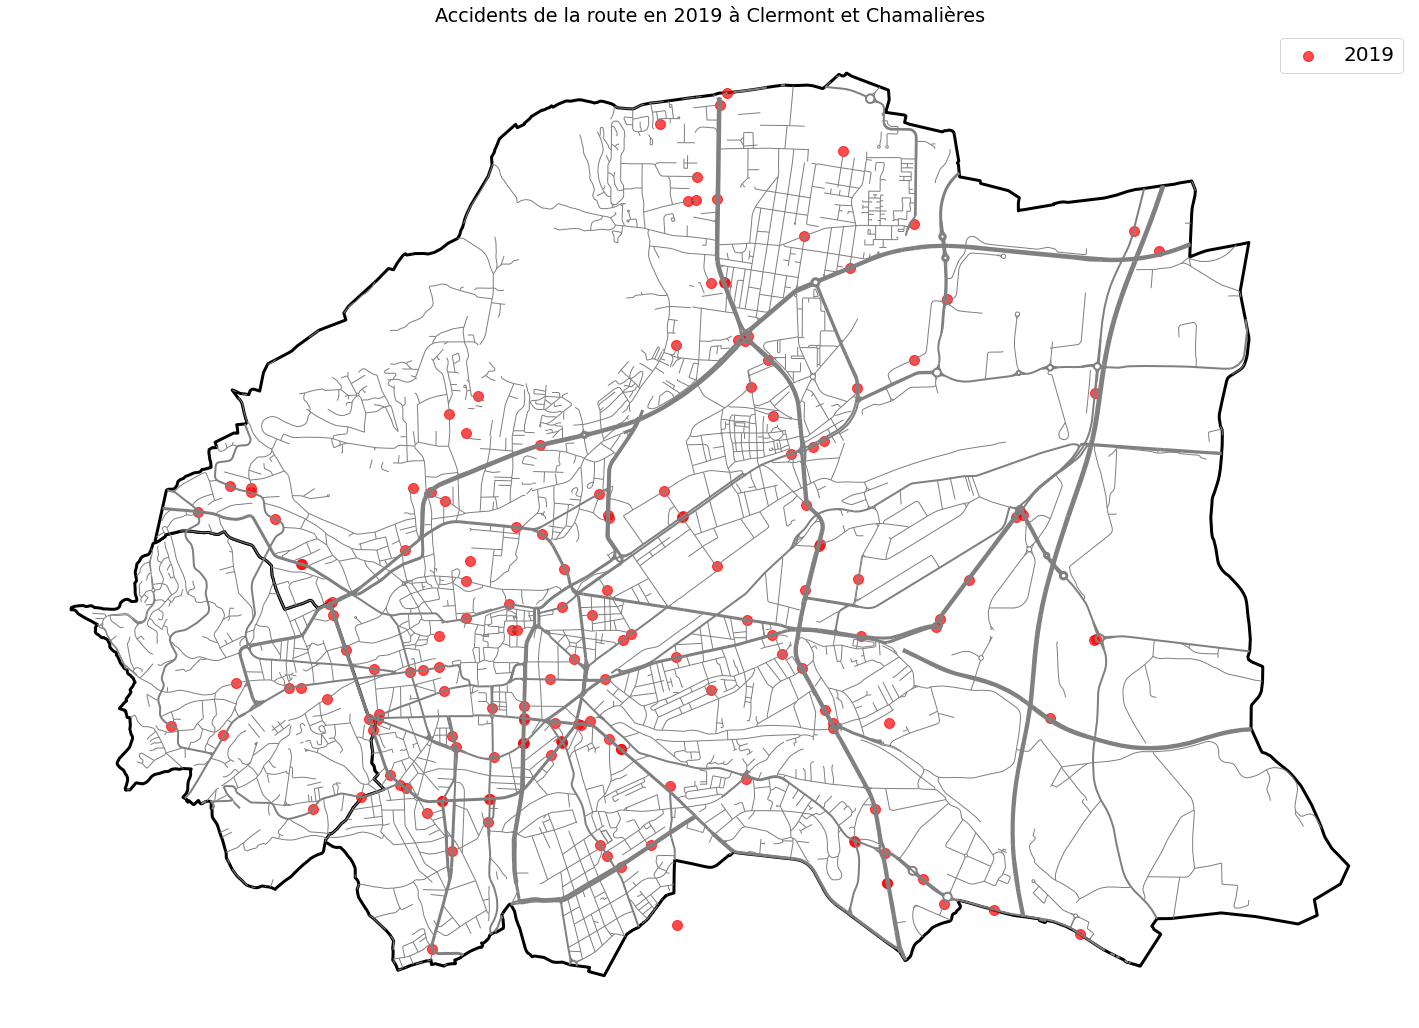

In [5]:
title = 'Accidents de la route en 2019 à Clermont et Chamalières'
drawMap(df_list, vehic_list, usager_list, annee, metro, route_clipped, title)

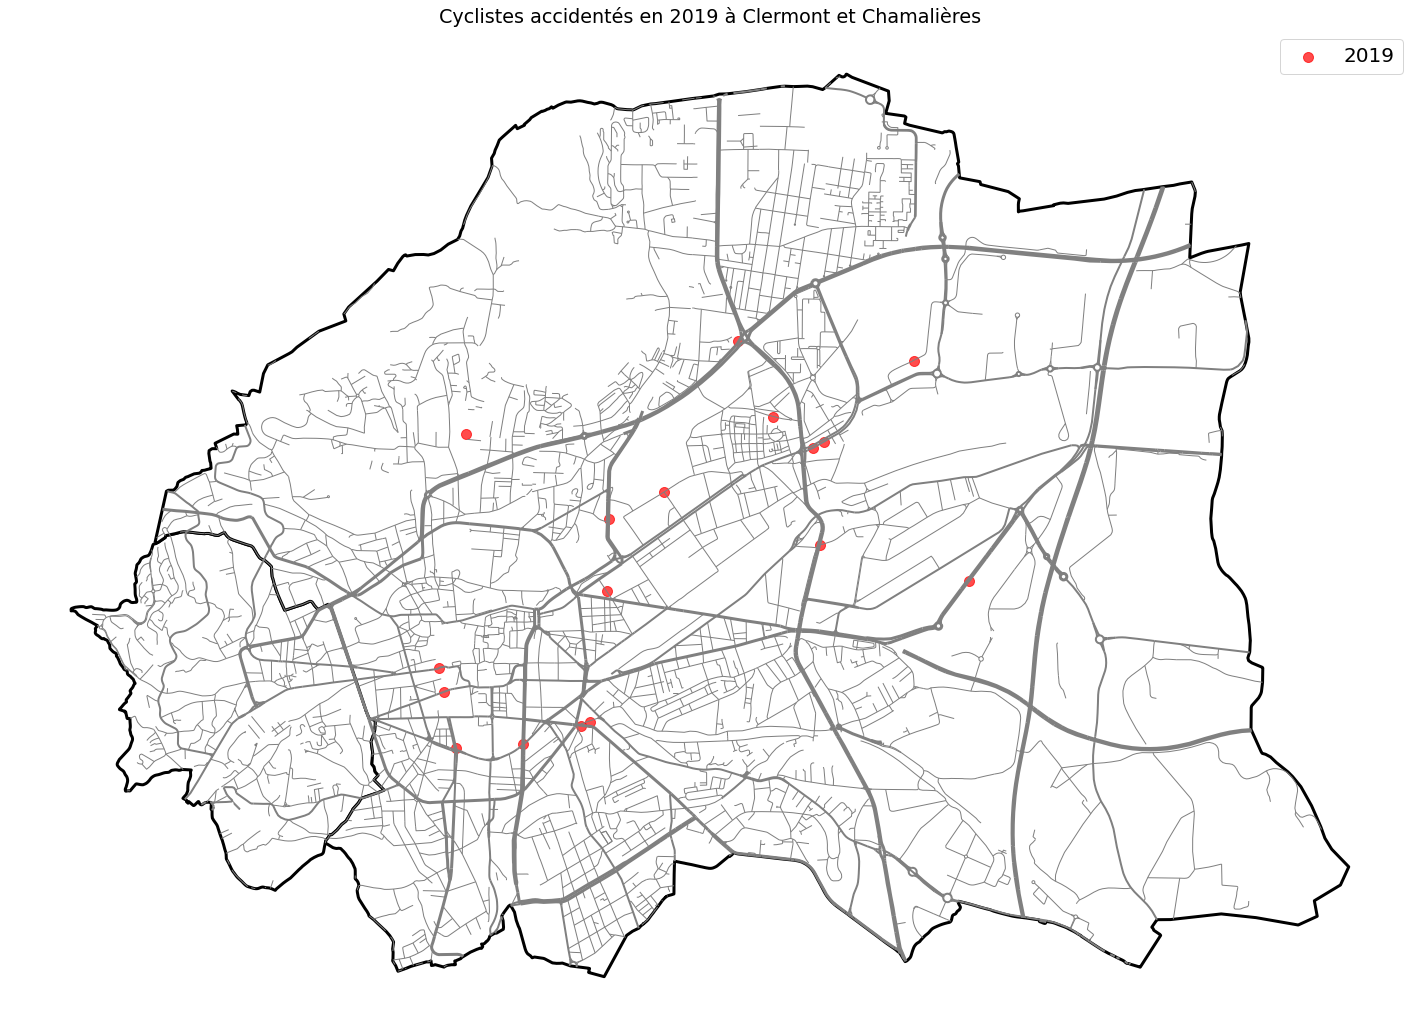

In [6]:
title = 'Cyclistes accidentés en 2019 à Clermont et Chamalières'
drawMap(df_list, vehic_list, usager_list, annee, metro, route_clipped, title, vehic_type=1)

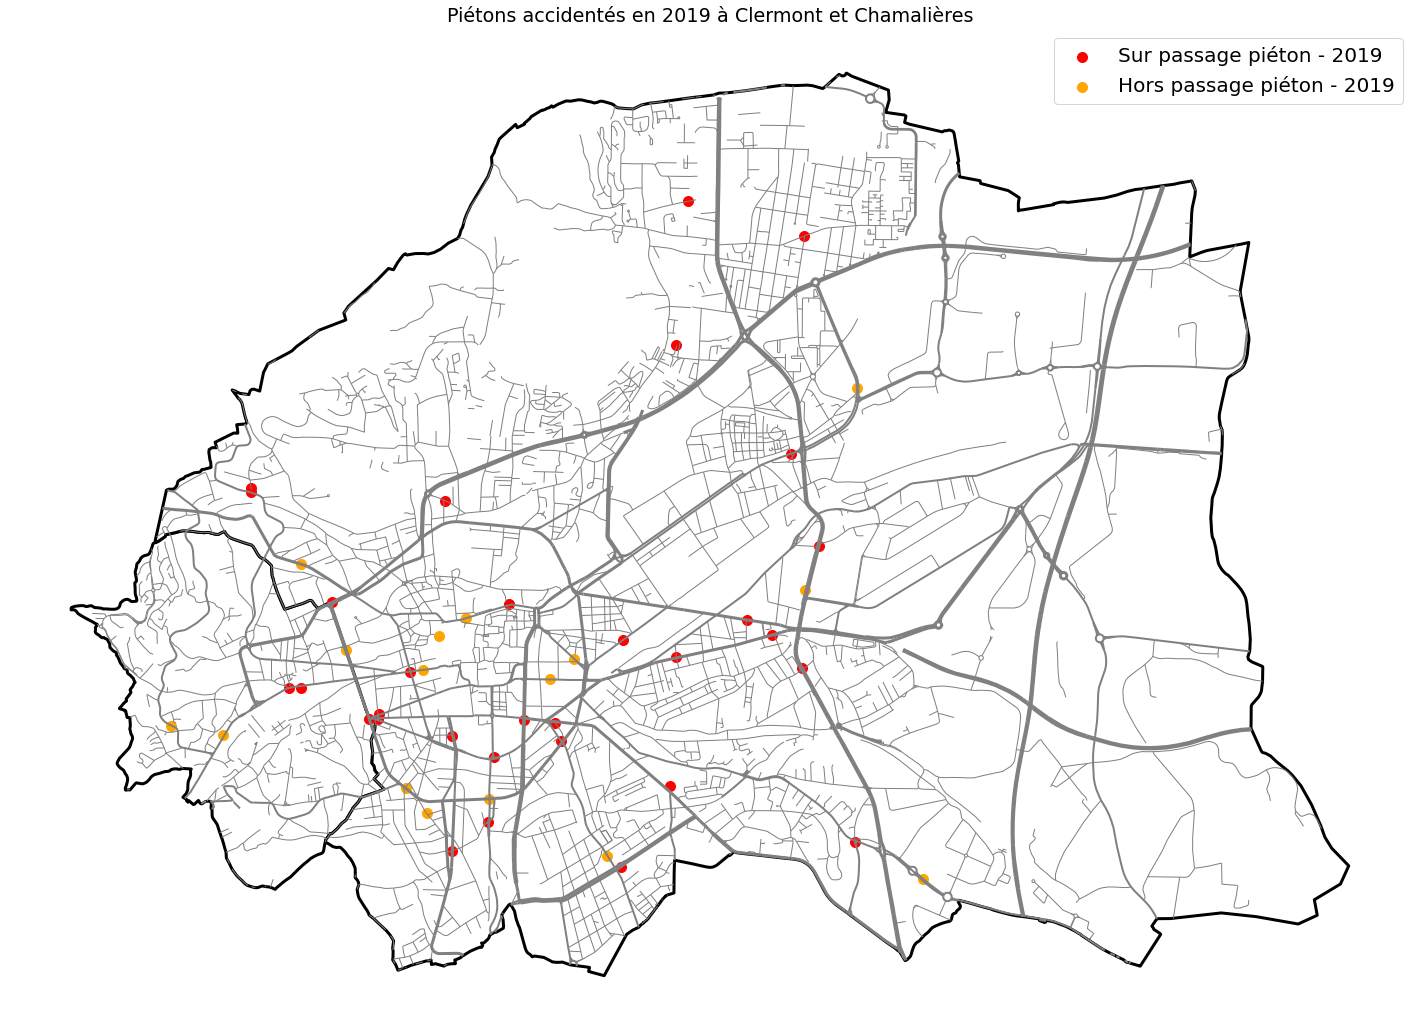

In [7]:
title = 'Piétons accidentés en 2019 à Clermont et Chamalières'
drawMap(df_list, vehic_list, usager_list, annee, metro, route_clipped, title, usager_type=3)
plt.savefig('pietons.jpg')

## Analyse chiffrée (Clermont 2019)

### Nombre de collisions avec un piéton (obsm==1) pour chaque type de véhicule

In [9]:
vehic_list[0][vehic_list[0].obsm==1].catv.value_counts()

7     38
10     3
30     2
37     2
14     1
40     1
Name: catv, dtype: int64


|catv|7|10|14|30|37|40|
| --- | --- |  --- | --- | --- | --- | --- |
|véhicule|voiture|utilitaire|Poids lourd|scooter|bus|tramway|
|nombre|38|3|2|2|1|1|

### Type d'obstacle mobile heurté dans les accidents de vélo

In [11]:
vehic_list[0][vehic_list[0].catv==1].obsm.value_counts()

2    16
0     2
Name: obsm, dtype: int64


|obsm|0|2|
| --- | --- |  --- |
|obstacle|aucun|véhicule|
|nombre|16|2|

### Type d'obstacle fixe heurté dans les accidents de vélo

In [103]:
vehic_list[0][vehic_list[0].catv==1].obs.value_counts()

0    17
8     1
Name: obs, dtype: int64

|obsm|0|8|
| --- | --- |  --- |
|obstacle|aucun|poteau|
|nombre|17|1|

### Gravité des blessures des piétons accidentés

In [10]:
# selection des accidents impliquant des piétons pour le dataset sur les usagers
usager_pieton = usager_list[0][usager_list[0].catu==3]

In [96]:
usager_pieton.grav.value_counts()

4    30
3    17
2     1
Name: grav, dtype: int64

|grav|2|3|4|
| --- | --- |  --- | --- |
|Gravité|tué|blessé hospitalisé|blessé léger|
|nombre|1|17|30|

### Action du piéton

In [97]:
usager_pieton.actp.value_counts()

3    39
9     3
5     3
B     2
1     1
Name: actp, dtype: int64

|actp|1|3|5|9|B|
| --- | --- |  --- | --- | --- | --- |
|Action|dépacement dans le sens du véhicule heurtant|traversant|jouant/courant|autre|inconnue|
|nombre|1|39|3|3|2|

### Localisation du piéton

In [99]:
usager_pieton.locp.value_counts()

3    18
4    14
2     5
1     4
9     4
5     2
0     1
Name: locp, dtype: int64

|locp|0|1|2|3|4|5|9|
| --- | --- |  --- | --- | --- | --- | --- | --- |
|Location|sans objet|chaussée (+50m d'un passage piéton)|chaussée (-50m d'un passage piéton)|passage piéton (sans signalisation lumineuse)| passage piéton (avec signalisation lumineuse)|trottoir|inconnue|
|nombre|1|4|5|18|14|2|4|